Question 1

In [4]:
import yfinance
import pandas as pd

tsla = yfinance.Ticker('TSLA')
telsa_data = tsla.history(period='max')
telsa_data.reset_index(inplace=True)

print(telsa_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2

In [5]:
import bs4
import requests
import pandas as pd
from bs4 import BeautifulSoup
import yfinance as yf


data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text
soup = BeautifulSoup(data, 'html.parser')

tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    row.find_all("td")
    col = row.find_all('td')
    year = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[year], "Revenue":[revenue]})])


tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',','')
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
print(tesla_revenue.tail())

         Date Revenue
0  2010-09-30      31
0  2010-06-30      28
0  2010-03-31      21
0  2009-09-30      46
0  2009-06-30      27


Question 3

In [6]:
import yfinance as yf

gme = yf.Ticker('gme')
gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)


print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4

In [7]:
import bs4
import requests
import pandas as pd
from bs4 import BeautifulSoup

html_data_2 = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

beatiful_soup = BeautifulSoup(html_data_2, 'html.parser')

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in beatiful_soup.find_all('tbody')[1].find_all('tr'):
  col = row.find_all('td')
  date = col[0].text
  revenue = col[1].text

  gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue": [revenue]})])

gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(',','')
print(gme_revenue.tail())

         Date Revenue
0  2006-01-31    1667
0  2005-10-31     534
0  2005-07-31     416
0  2005-04-30     475
0  2005-01-31     709


Question 5

/tmp/ipykernel_116/2423960307.py:12: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_116/2423960307.py:13: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



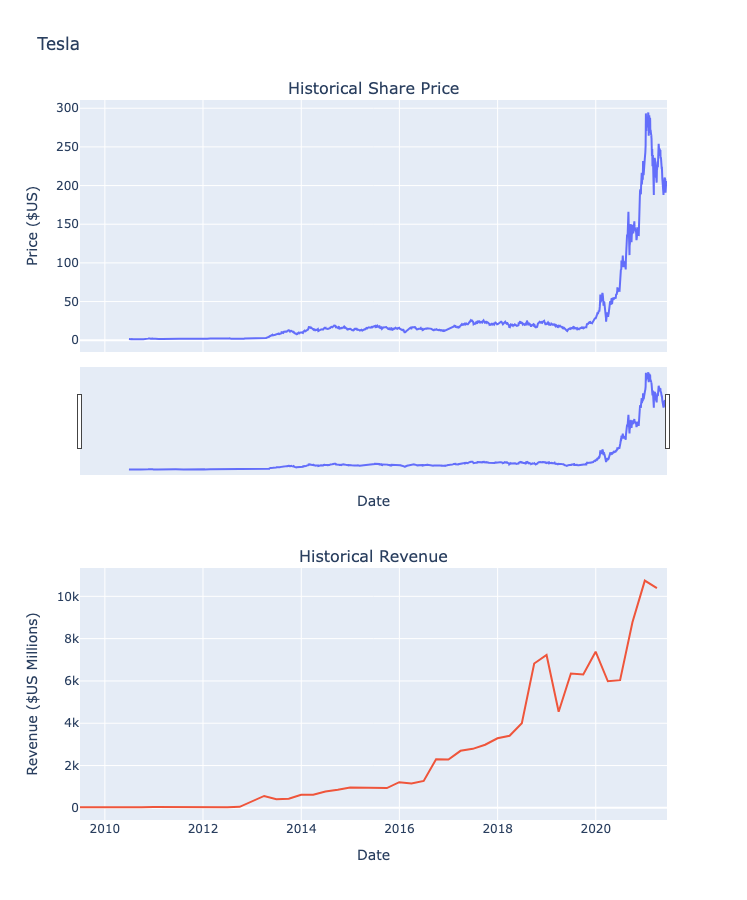

In [9]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

telsa_data = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm').text
soup = BeautifulSoup(telsa_data, 'html.parser')

tsla = yf.Ticker('TSLA')
telsa_data = tsla.history(period='max')
telsa_data.reset_index(inplace=True)

tesla_revenue = pd.DataFrame(columns=['Date','Revenue'])

for row in soup.find_all('tbody')[1].find_all('tr'):
    row.find_all("td")
    col = row.find_all('td')
    year = col[0].text
    revenue = col[1].text

    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date":[year], "Revenue":[revenue]})])

#tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\\$',"")
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$', '', regex=False).str.replace(',','')
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
#print(tesla_revenue)
make_graph(telsa_data, tesla_revenue, 'Tesla')


In [ ]:
Question 6

/tmp/ipykernel_116/106843340.py:14: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_116/106843340.py:15: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



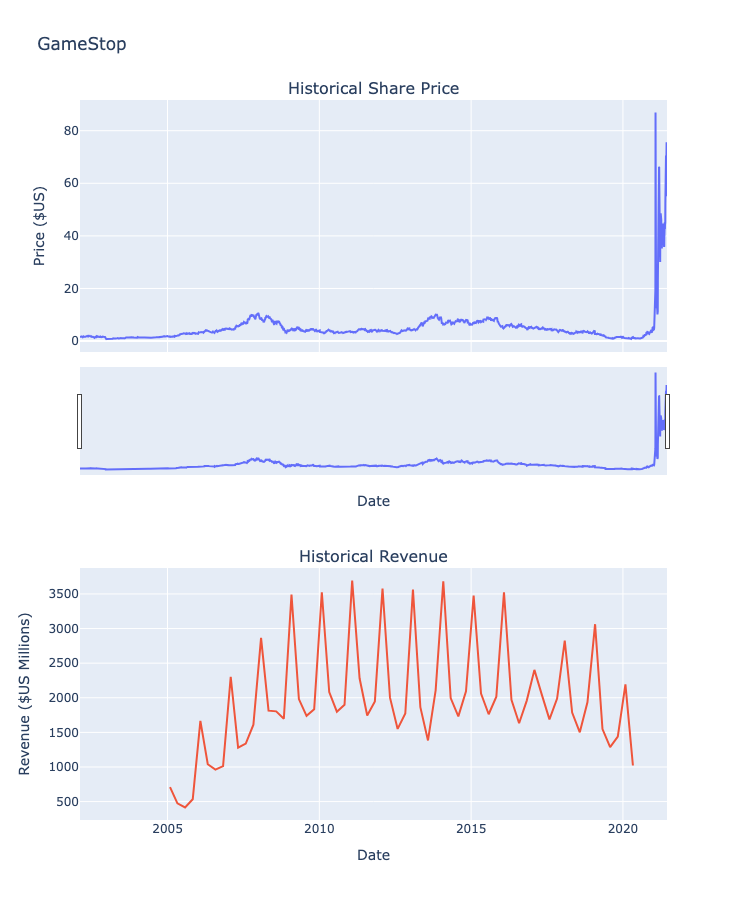

In [14]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots



def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()


html_data_2 = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html').text

beatiful_soup = BeautifulSoup(html_data_2, 'html.parser')

gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])

for row in beatiful_soup.find_all('tbody')[1].find_all('tr'):
  col = row.find_all('td')
  date = col[0].text
  revenue = col[1].text

  gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date":[date], "Revenue": [revenue]})])


gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=False).str.replace(',','')

gme = yf.Ticker('GME')

gme_data = gme.history(period='max')
gme_data.reset_index(inplace=True)

#print(gme_data['Date'])

make_graph(gme_data, gme_revenue, 'GameStop')